# Ejercicios evaluables - Matemáticas para la IA

In [1]:
import numpy as np
import numpy.linalg as linalg
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Ejercicio 2

#### Apartado a)

Se define en primer lugar la función *grad_func*, que tiene dos parámetros: el punto donde se evalua el gradiente y la función cuyo gradiente hay que calcular (o derivada en el caso unidimensional). Aquí es donde se crean los gradientes de las funciones f y g del enunciado.

$f(x) = 3x^4 + 4x^3 − 12x^2 + 7  \hspace{0.5cm} \Longrightarrow \hspace{0.5cm} f'(x) = 12x^3+12x^2-24x$

$g(x, y) = x^2 + y^3 + 3xy + 1 \hspace{0.5cm} \Longrightarrow \hspace{0.5cm} \nabla g(x,y) = \left( 2x+3y, 3x+3y^2 \right)$

In [2]:
def grad_func(x, funcion):
    
    if funcion == 'f':
        y = 12*(x**3)+12*(x**2)-24*x
    else:
        y = np.array([2*x[0]+3*x[1], 3*(x[1]**2)+3*x[0]])
    return y

Diseñamos ahora la funcion que implementa el método de descenso de gradiente con los parámetros descritos más el parámetro función comentado previamente:

In [3]:
def descenso_grad(x, ratio, tol, maxit, funcion):
    
    grad_norm = linalg.norm(grad_func(x, funcion))
    cont = 0 #contador de iteraciones
    
    while grad_norm >= tol and cont <= maxit:
        grad = grad_func(x, funcion)
        x = x - ratio*grad 
        grad_norm = linalg.norm(grad)
        cont += 1
        
    return x

#### Apartado b)

1) Se aplica el método sobre $f(x)$ con los parámetros indicados:

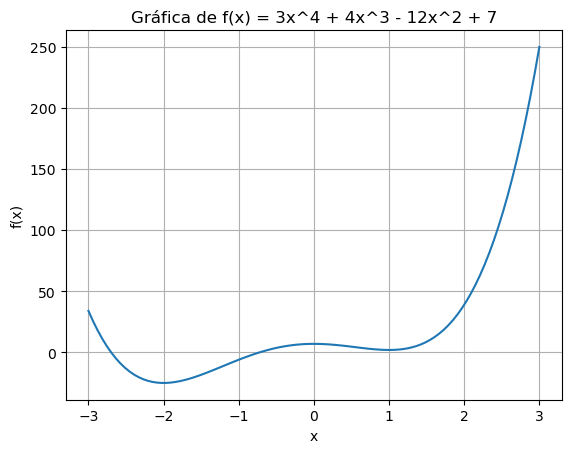

In [18]:
def f(x):
    return 3*x**4 + 4*x**3 - 12*x**2 + 7

# Generar valores de x en el rango deseado
x = np.linspace(-3, 3, 100)  # Rango de -2 a 2 con 100 puntos equidistantes

y = f(x)

plt.plot(x, y)
plt.title("Gráfica de f(x) = 3x^4 + 4x^3 - 12x^2 + 7")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.show()


In [5]:
descenso_grad(3, 0.001, 1e-12, 1e5, 'f')

1.0000000000000266

2) Se aplica el método sobre $f(x)$ con los parámetros indicados:

In [6]:
descenso_grad(3, 0.01, 1e-12, 1e5, 'f')

-1.9999999999999967

3) Como $f'(x) = 12x(x^2+x-2)$, se deduce fácilmente que los ceros de la derivada son x=0, 1, -2. Evaluando dichos puntos en la segunda derivada 

$$f''(x) = 36x^2 +24x-24,$$ 

se obtiene que:
- $f''(0) = -24 < 0 \quad \Longrightarrow  0$ es un máximo.
- $f''(1) = 36 > 0 \quad  \Longrightarrow  0$  es un mínimo.
- $f''(-2) = 72 > 0 \quad \Longrightarrow  0$ es un mínimo.

Aunque el punto inicial era el mismo para los apartados 1 y 2, el ratio era distinto. El ratio marca cuanto nos movemos en la dirección de mmáximo descenso. Por tanto, la elección de un ratio relativamente grande puede llegar a tener como consecuencia que converjamos a un mínimo que no es el más cercano al punto de partida. Incluso si el ratio es demasiado grande, el método puede llegar a no converger como se verá en el siguiente apartado.

4) Aplicamos el método sobre $f(x)$ con los parámetros indicados, pero al ejecutar nos da un error de que el valor es demasiado grande de calcular.

In [7]:
descenso_grad(3, 0.1, 1e-12, 1e5, 'f') # Si se ejecuta da error

OverflowError: (34, 'Result too large')

El motivo de que de error es que se está tomando un ratio demasiado grande. En la primera iteración $x_1$ vale: 

$$x_1 = x_0 - \gamma  f'(x_0) = 3 - 0.1 360 = -33$$ En la segunda, 

$$x_2 = x_1 - \gamma  f'(x_1) = -33 - 0.1 (-417384) = 41705.4$$ 

Y en la tercera:

$$x_3 = x_2 - \gamma  f'(x_2) = -87049951065956.78 $$

Lo que esta ocurriendo es que en cada iteración se desplace en el sentido del mínimo, se esta desplazando 'de más' y por tanto el método no converge. Es decir, los puntos $x_n$ calculados van apareciendo a la izquierda y derecha del mínimo alternadamente  pero cada vez más lejos del mínimo.

5. Si aplicamos ahora el método con punto inicial 0:

In [8]:
descenso_grad(0, 0.001, 1e-12, 1e5, 'f')

0

Esto no es un resultado deseable puesto que es un máximo. Al ser un máximo la derivada se anula y nuestro método no funciona pues:
$$x_1 = x_0 - \gamma  f'(x_0) = 0 - 0 = 0,$$
y en consecuencia todos los $x_$ sucesivos serán también cero, luego el método converge al mismo punto de inicio si es un máximo.

#### Apartado c)

1) Se aplica el método con los parámetros indicados, se obtiene el punto donde se alcanza el mínimo, como se verá en el último apartado:

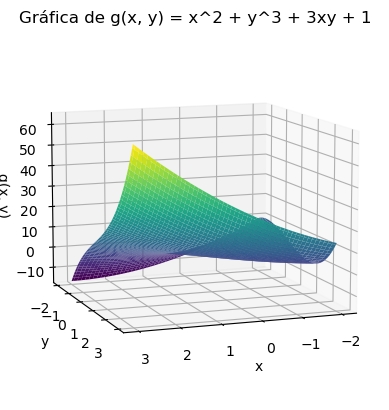

In [25]:

def g(x, y):
    return x**2 + y**3 + 3*x*y + 1

# Generar valores de x e y en el rango deseado
x = np.linspace(-2, 3, 100)
y = np.linspace(-2, 3, 100)
X, Y = np.meshgrid(x, y)

# Calcular los valores de z utilizando la función g(x, y)
Z = g(X, Y)

# Crear la figura y los ejes 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar la superficie con una paleta de colores modificada
ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')


# Ajustar el ángulo de visualización
ax.view_init(10, 70)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('g(x, y)')


plt.title("Gráfica de g(x, y) = x^2 + y^3 + 3xy + 1")
plt.show()

In [10]:
descenso_grad(np.array([-1,1]), 0.01, 1e-12, 1e5, 'g')

array([-2.25,  1.5 ])

2. Si se parte ahora del punto origen, se obtiene un resultado no deseable pues (0,0) no es un mínimo como se verá en el siguiente apartado.

In [11]:
descenso_grad(np.array([0,0]), 0.01, 1e-12, 1e5, 'g')

array([0, 0])

3. En el primer apartado a) obtuvimos el gradiente de $g(x,y)$. Igualando el gradiente al vector nulo se obtienen los puntos críticos (resolviendo un sistema de dos ecuaciones con dos incógnitas), que son: $a=(0,0)$ y $b=(-2.25, 1.5)$. Si calculamos la matriz Hessiana de $g$: 

$$ \mathcal{H}_{(x,y)}g = \begin{bmatrix}
2 & 3 \\
3 & 6y 
\end{bmatrix}.  $$

Esto implica que:
$$ \mathcal{H}_{a}g = \begin{bmatrix}
2 & 3 \\
3 & 0 
\end{bmatrix} \quad \Longrightarrow  \quad |\mathcal{H}_{a}g| = -9 \quad \Longrightarrow \quad a=(0,0) \quad \textrm{es un punto de silla}.$$
y
$$ \mathcal{H}_{b}g = \begin{bmatrix}
2 & 3 \\
3 & 9 
\end{bmatrix} \quad \Longrightarrow \quad |\mathcal{H}_{b}g| = 9 \quad \Longrightarrow \quad b=(-2.25,1.5) \quad \textrm{es un mínimo (observe que el elemento 1,1 de la matriz también es positivo)}.$$